# **Recurrent Neural Networks**

## **Introduction**

* Reccurent Neural Networks (RNNs) have been designed to process sequential data (where order matters);

\\

* RNNs found remarkable applications in Natural Language Processing (NLP) such as: Sentiment Analysis, Named Entity Recognition, Language Translation;

\\

* Other than NLP, RNNs may be applied in Time Series prediction, Sound Transcription and Sequence Generation.

## **Introduction to Sequence Representation**

* Consider the sentence :

  * ***She works at Apple since she graduated.***

\\

* The word ***Apple*** here refers to the company rather than the fruit;

\\

* In linguistics/NLP this type of words are called **Named Entities**.

\\

* If we aim to automatically recognize Named Entities it is obvious that the words ***works*** and ***at*** are the ones that indicate the Named Entity nature of ***Apple***;



* In Machine Learning, when sentences are the input represented as sequence of words;

\\

* Words in turn are represented as vectors, the sentence above can be one hot encoded as  

\\

\begin{equation}
\begin{bmatrix}
\mbox{she:} & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
\mbox{works:} & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
\mbox{at:} & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
\mbox{apple:} & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
\mbox{since:} & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
\mbox{she:} & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
\mbox{graduated:} & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\end{equation}


In [ ]:
url ="https://miro.medium.com/v2/resize:fit:1144/1*1WHPailNU5Nxv3gtUkbFdg.gif"
from IPython.display import Image
Image(url=url)

## **Sequence Processing**

* Consider model predicting Named Entities:
  * Input sentences are $x$ with $T_x$ words;
  * Words $\{x_t, \quad t = 1,\ldots,T_x\}$ are processed **sequentially**
  * To each $x_t$ the model outputs $y_t = 1$ if named entity $y_t = 0$ otherwise

![](https://drive.google.com/uc?export=view&id=1v-0BbVE_0_S7OGHt_qIcb66Jew77VOjF)


* RNN architecture is made up by:
  * MLP units;
  * processing one $x_t$ at a time;
  * where previous hidden layer $h_{t-1}$ serves as **memory**.  

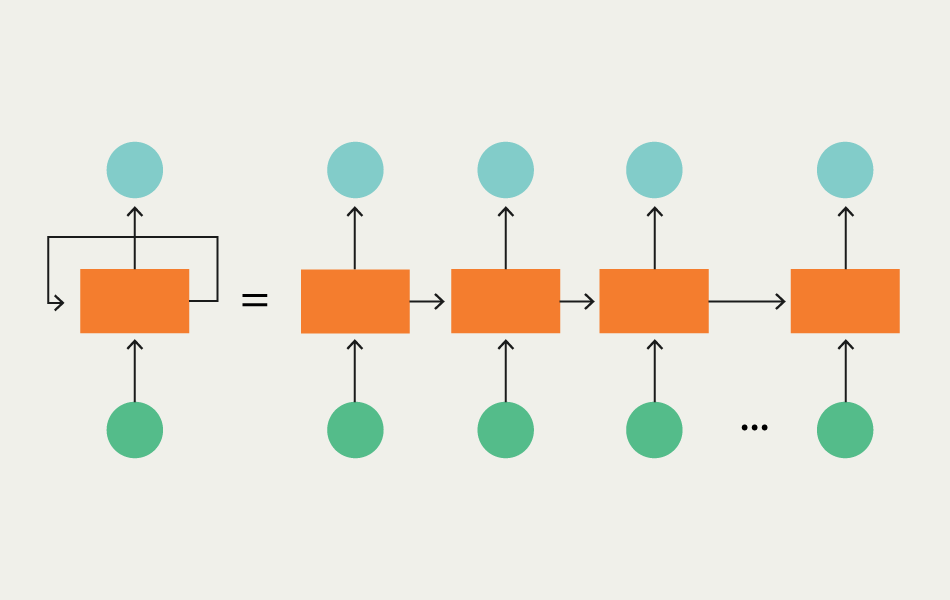

## **RNN Model**

### **Definition**

* Let $x$ be $[T_x \times d]$ be sequence input and $y \in {\rm I\!R}^k$ be some target;

\\

* $\mbox{RNN}=(x)$ is defined as function based on Recurrent Neural Network processing $x$ where




$$
\mbox{RNN}(x) =
\left\{
\begin{array}{ll}
h_t = a\left(\bf{W}_{hx} x_{t} +  \bf{W}_{hh} h_{t-1} + b_{h} \right), \\
\\
y_t = a\left( \bf{W}_{y} h_{t} + b_{y} \right).\\
\end{array}
\right.
$$

\\

* where activation function $a(.)$ is
  * $\mbox{tanh}$ or $\mbox{ReLU}$ in hidden layers;
  * $\mbox{linear}$ or $\mbox{softmax}$ in output layers

\\

![](https://drive.google.com/uc?export=view&id=1-fGsXaWqgTJoIhvcTVVWPwi7r0GIuLDg)

\\

* Matrices $\bf{W}_{hx}$ and $\bf{W}_{hh}$ can be concatenated and be applied to the concatenation of $x_t$ and $h_{t-1}$

\\

$$
\mbox{RNN}(x) =
\left\{
\begin{array}{ll}
h_t = a\left(\bf{W}_{h}[x_{t}, h_{t-1}] + b_{h} \right), \\
\\
y_t = a\left( \bf{W}_{y} h_{t} + b_{y} \right).\\
\end{array}
\right.
$$

### **Loss Function/Training**

* Loss Functions $J$ such as MSE or Cross Entropy remain applicable in RNNs;

\\

* in RNNS, Loss functions $J$ and backpropagation algorithm are computed over the **unrolled** version of the neural network;

\\

![](https://drive.google.com/uc?export=view&id=11lSyyUlbxhaboi4dC4h0j1oNU1TXPX8X)

\\

* Let $x, y$ be input,output sequences of size $T$ and $\mbox{RNN}(x)$ some
recurrent neural network with parameters $\bf{\theta}$;

\\


$$
J(\bf{\theta},x,y) = \sum_{t = 1}^{T_x} J(\bf{\theta},x_t,y_t).
$$

\\

* RNNs are trained with **Backpropagation through Time** where:
  * gradient $\nabla_{\bf{\theta}} y_t$ are computed at every timestamp $t$;
  * then averaged during the update phase of $\bf{\theta}$.

## **Types of RNNs**

* RNN architectures vary according to the task they are designed for;

\\

* RNN architecture depends on two types of criterias:
  * 1. **Task related**: input/output sequence lengths $(T_x,T_y)$;
  * 2. **Model related**: ***depth*** of model and ***direction*** of information;

### **Task Related**

![](https://drive.google.com/uc?export=view&id=1gwtWiQveBze4RVeIE6QaRKDPTCQ2-1oT)

**Many To Many**

* Situation: $T_x = T_y$
* Application Example: Identification of Grammatical Functions.

\\

**Many To One**

* Situation: variable $T_x$ and $T_y = 1$
* Application Example: Sentiment Analysis.

\\

**Many To Many**

* Situation: $T_x \neq T_y$
* Application Example: Language Translation.

\\

**One To Many**

* Situation: $T_x = 1$, $T_y > 1$
* Application Example: Text Generation.






### **Model Related**

#### **Bidirectional RNN**

* Bidirectional RNNs are useful When the whole input sequence is available;

\\

* Output $y_t$ take into account information from the past and the future

\\

![](https://drive.google.com/uc?export=view&id=1jG6GMdC5EF8yXfX_QKTA3eyaUzNdpeDu)

\\

$$
\mbox{Bi-RNN}(x) =
\left\{
\begin{array}{ll}
h_t^p = a\left(\bf{W}_{h^p}[x_{t}, h_{t-1}^p] + b_{h^p} \right), \\
\\
h_t^f = a\left(\bf{W}_{h^f}[x_{t}, h_{t+1}^f] + b_{h^f} \right), \\
\\
y_t = a\left( \bf{W}_{y} \left[h_{t}^p, h_{t}^f \right] + b_{y} \right).\\
\end{array}
\right.
$$


#### **Deep RNN**

* Deep RNNs stack more than one hidden layer;

 \\

* Each hidden layer at timestamp $t-1$ will only feed the hidden layer of the same rank at timestamp $t$

\\

* Below is an illustration of Deep RNN with $3$ hidden layers

\\

![](https://drive.google.com/uc?export=view&id=15u6K-NsDG6Ofe1vRA1iog1Valipl-uM8)

\\

* Deep RNN can also be Bidirectional.

## **Keras/Tensorflow Instructions**

* in Keras all sequence input must be shaped as

\\

$$
 \mbox{# examples} \times  \mbox{# timestamps} \times \mbox{# features}
$$

\\

* **[SimpleRNN](https://keras.io/api/layers/recurrent_layers/simple_rnn/)** layer in Keras implements **Reccurent Hidden layer** $h_t$;

\\

* To get **many to one** architecture: SimpleRNN must be connected to Dense (Fully Connected) Layer.  



In [ ]:
tf.keras.layers.SimpleRNN(
                          units,
                          activation="tanh", #Default Activation Function
                          return_sequences=False, #If True: returns evaluations of h_t at every timestamp t = 1,...,Tx
                                                  #Useful to build Deep RNNs
                          return_state=False,#If True: returns last evaluation  h_Tx
                          stateful=False#If True: memorizes hidden state for next predictionss
                         )

* The Class **[Bidirectional](https://keras.io/api/layers/recurrent_layers/bidirectional/)** is wrapper allowing to handle previous and next hidden states

In [ ]:
from tensorflow.keras.layers import Input, SimpleRNN, Bidirectional, Dense

input_layer = Input((None,3)) #(None, 3) means sequences of arbitrary lengths where each xt is 3D
h = Bidirectional(SimpleRNN(64, activation = 'tanh'))(input_layer)
output = Dense(1)(h)

* To implement **many to many** same length architecture:
  * set return_sequences = True inside recurrent layer;
  * wrap the output layer with **[TimeDistributed](https://keras.io/api/layers/recurrent_layers/time_distributed/)**.

* Note that TimeDistributed can be used in input layer as well. It happens when $x_t$ must run through CNN before being injected into recurrent layer.

## **LSTM/GRU RNNs**

### **Introduction**

* RNNs tend to struggle in capturing long dependencies due to $2$ main reasons

  * **Exploding and Vanishing Gradients**: this happens with long sequences $x$ and weight matrices whose entries are close to zero (respectively higher than 1) leading to exponentially decreasing (exponentially growing) gradients.  

  * The only memory simple RNNs have is $h_{t-1}$ which always update according to fixed (learned) parameters.

\\

* To tackle these limits,  **[Schmidhuber and Hochreiter](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.676.4320&rep=rep1&type=pdf)** came up with variation of RNN called **Long Short Term Memory** RNN.

### **LSTM**

#### **Introduction**

* LSTM relies on $2$ memories:
  * previous hidden state $h_{t-1}$;
  * cell state  $C$ regulated by $3$ gates.


![](https://drive.google.com/uc?export=view&id=1cOAmX3uD84QxxXK_vuKKyuqpfUC7Df95)


#### **Model**

* The gates that regulate Cell State $C_t$ are:

    * **Forget Gate** $f_t$: selects which neurons in $C_{t-1}$ should be forgotten;
    
    \\
    \begin{equation}
    f_t = \sigma(\bf{W}_f [x_t,h_{t-1}] + b_f).
    \end{equation}
    \\
    
    * **Input Gate** $i_t$: selects which neurons in new $C$ must be taken into account;

    \\
    \begin{equation}
    i_t = \sigma(\bf{W}_i [x_t,h_{t-1}] + b_i).
    \end{equation}
    \\

    * **Output Gate** $o_t$: selects which neurons in $C_t$ should be taken into account  

    \\
    \begin{equation}
    o_t = \sigma(\bf{W}_o [x_t,h_{t-1}] + b_o).
    \end{equation}
    \\

* $C_t$ is obtained as combination of previous $C_{t-1}$ and new candidate noted $\widetilde{C}_t$

    \\
    \begin{equation}
    \begin{array}{11}
    C_t &=& f_t * C_{t-1} + i_t*\widetilde{C}_t,\\
    \widetilde{C}_t &=& tanh(\bf{W}_c [x_t,h_{t-1}] + b_c)
    \end{array}
    \end{equation}
    \\

* Finally the hidden layer $h_t$ is obtained from gatted $C_t$

  \\
  \begin{equation}
  h_t = o_t *tanh(C_t).
  \end{equation}


#### **LSTM Scheme**

* LSTM Architecture can be summarized as

\\

![](https://drive.google.com/uc?export=view&id=1fiqXabfEHqp4XLK8b7IrYP6vwtlFOEmn)

\\

* Just like simple RNN, LSTM can also be Bidirectional and stacked to form Deep LSTMs.

#### **LSTM in Keras/Tensorflow**

* LSTM unit is implmented with Class layer **[LSTM](https://keras.io/api/layers/recurrent_layers/lstm/)**

In [ ]:
tf.keras.layers.LSTM(
                    units, #number of neurons in hidden layer (to be added to nbr of features of x_t) = number of neurons in Cell  State
                    activation="tanh", #activation function of \widetilde{C}
                    recurrent_activation="sigmoid", #activation function of forget, input and update gates
                    return_sequences=False, #if True returns h_t,c_t for each timestamp t
                    return_state=False, #if True returns last h_t,c_t
                    stateful=False #memorizes h_t,c_t
                   )

### **GRU**

* Gated Reccurent Units are simplification of LSTM introduced by [Junyoung Chung](https://arxiv.org/pdf/1412.3555.pdf?ref=hackernoon.com);

\\

* GRUs rely on $2$ gates:
  * Update $u_t$;
  * Relevency $r_t$ applied on $C_{t-1}$;

\\

* GRU model is formally defined by

$$
\mbox{GRU}(x) =
\left\{
\begin{array}{ll}
\widetilde{C}_t = tanh(\bf{W}_c [x_t,h_{t-1}] + b_c), \\
\\
u_t = \sigma(\bf{W}_u [x_t,c_{t-1}] + b_u),\\
\\
r_t = \sigma(\bf{W}_r [x_t,c_{t-1}] + b_r),\\
\\
C_t = u_t * \widetilde{C} + (1 - u_t) C_{t-1},\\
\\
h_t = C_t.
\end{array}
\right.
$$

\\

* In Keras/Tensorflow GRU unit is implemented with layer **[GRU](https://keras.io/api/layers/recurrent_layers/gru/)**.


## **Word Embeddings**

### **Introduction**

* One hot encoding words in text data is appealing because of its simplicity;

\\

* To grasp intuition, consider vocabulary of $3$ words

\\
  $$
  V = \{\mbox{ML},\mbox{Yoga},\mbox{DL}\},
  $$

\\

* One hot encoding $V$  results into $3$ **orthogonal** vectors

\\

![](https://drive.google.com/uc?export=view&id=1iCFULeDQlge7gvGMD9pzzem4jVo_hKJ_)


\\

* Such representation makes every word equidistant with the others;
* It is obvious that $\mbox{ML}$ and $\mbox{DL}$ are related while $\mbox{Yoga}$ has nothing to do with them.

\\

* Word Embedding is the process of redefining words representation according to their semantic value.

\\

![](https://drive.google.com/uc?export=view&id=18DQQ--q93y6vBHWkL_HDEclCbF8fRNYq)

\\

* In practice, we deal with huge vocabularies $V$, in that case Word Embeddings aim to:
  * Find representations semantically based;
  * Reduce the size of word representation.

* Please note that semantic similarities is estimated according to cooccurences and thus it is corpus related.

### **Embedding Matrix**






* Let $\bf{E}$ be the Embedding Matrix of vocabulary $V$.

\\

*  $O_w$ is the one hot encoding of word $w$.

\\

* Embedding of $w$ can be obtained by the product

\\

$$
E_w = \bf{E} \times O_w.
$$

![](https://drive.google.com/uc?export=view&id=1pR321PePv-kG2-r0kGhS0DR_CHoOkL2X)



* To train Embedding Matrix in Keras, use **[Embedding](https://keras.io/api/layers/core_layers/embedding/)** layer

In [ ]:
tf.keras.layers.Embedding(
                          input_dim, #Vocabulary Size (+1 for Unknown words)
                          output_dim, #Embedding dimension
                          input_length=None #Length of sequence x_t
                          )

### **Learning Word Embedding**

#### **Embedding for Model Language**

* **[Morin & Bengio](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.221.8829&rep=rep1&type=pdf#page=255)** propose Learning $E$ through Softmax model where:
  * input: some fixed context words
  * output: target word;

\\

* **Example**:
  * Consider the phrases:
    * ***Deep Learning is fun***
    * ***Deep Learning is difficult***
    * ***Deep Learning is overrated***
  * From this corpus we generate context/target observations
    * (deep, learning, is),(fun)
    * (deep, learning, is),(difficult)
    * (deep, learning, is),(overrated)

\\

* $\mbox{E}$ is learned through gradient descent of the following Softmax Neural Network

![](https://drive.google.com/uc?export=view&id=1GYyGD6ydSRLpDi0rSBHHWxAVKb7x3iSI)



#### **Word2Vec**

* **[Mikolov](https://arxiv.org/pdf/1301.3781.pdf%C3%AC%E2%80%94%20%C3%AC%E2%80%9E%C5%93)** proposes $2$ word embeddings learning routines;

\\

![](https://drive.google.com/uc?export=view&id=1IVzgS3mlHegSOvgHj8Tv8LcQ65nEKn_T)

\\

* **CBOW**
  * trained to predict a single word from fixed window size of context words;
  * fast convergence;
  * learns better syntactic relationships between words:


\\

* **Skip-gram**  
  * trained to predict several context words from single input word;
  * slow convergence;
  * Skip-gram is better in capturing better semantic relationships.

\\

* In practice, CBOW tend to retrive as closest vectors morphologically similar words like plurals, i.e. 'cats' while Skip-gram would consider morphologically different words but semantically relevant like 'dog' much closer to 'cat' in comparison.


![](https://drive.google.com/uc?export=view&id=1OQhu2UfPpUQfRqL7BYU6i89UUpiH6VNj)


# **Application: Sentiment Analysis**

In [ ]:
# Import packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import tensorflow as tf

In [ ]:
# Load dataset IMDB
num_words = 10000
maxlen = 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# See the vocabulary
vec = imdb.get_word_index()
vec

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
# Create sequence
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
x_train.shape

(25000, 100)

In [ ]:
x_train

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]], dtype=int32)

In [ ]:
import numpy as np


array([0, 1])

In [ ]:
# Créer un modèle LSTM simple
model = Sequential()
model.add(Embedding(num_words, 128, input_length=maxlen))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

with tf.device('/device:GPU:0'):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, verbose=1,restore_best_weights=True)
  history=model.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=32,shuffle=True, callbacks=[early_stopping])


Epoch 1/100
625/625 [==============================] - 115s 178ms/step - loss: 0.4222 - accuracy: 0.8019 - val_loss: 0.3579 - val_accuracy: 0.8444
Epoch 2/100
625/625 [==============================] - 111s 177ms/step - loss: 0.2513 - accuracy: 0.8993 - val_loss: 0.3854 - val_accuracy: 0.8428
Epoch 3/100
625/625 [==============================] - 110s 176ms/step - loss: 0.1658 - accuracy: 0.9381 - val_loss: 0.5187 - val_accuracy: 0.8362
Epoch 4/100
625/625 [==============================] - 112s 179ms/step - loss: 0.1120 - accuracy: 0.9608 - val_loss: 0.4996 - val_accuracy: 0.8282
Epoch 5/100
625/625 [==============================] - 114s 183ms/step - loss: 0.0759 - accuracy: 0.9743 - val_loss: 0.6218 - val_accuracy: 0.8262
Epoch 6/100
625/625 [==============================] - 114s 182ms/step - loss: 0.0582 - accuracy: 0.9804 - val_loss: 0.6729 - val_accuracy: 0.8286
Epoch 7/100
625/625 [==============================] - 115s 185ms/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0

In [ ]:
# Évaluer le modèle
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

782/782 [==============================] - 11s 14ms/step - loss: 0.3824 - accuracy: 0.8346
Loss: 0.3823906183242798, Accuracy: 0.8345999717712402


In [ ]:

def predict_sentiment(text, model):
    # Remove punctuations
    text = text.lower()
    text_without_punctuation = text.translate(str.maketrans('', '', string.punctuation))
    tokens_id = []

    # Split text into a list of tokens
    tokens = text_without_punctuation.split()
    for i in tokens:
      tokens_id.append(vec[i])

    print(tokens_id)


    # Convert the text into sequences of word indices
    text_sequence = pad_sequences([tokens_id], maxlen=100)  # Make sure to set maxlen according to your model

    # Make the prediction
    prediction = model.predict(text_sequence)
    print(prediction)
    # Interpret the prediction
    if prediction[0] >= 0.5:
        return "Positive"
    else:
        return "Negative"



In [ ]:
import string
text ="Great work"
text.translate(str.maketrans('', '', string.punctuation))

'Great work'

In [ ]:
# Example of usage
text = "It was an excellent movie, I loved it!"
sentiment = predict_sentiment(text, model)
print(f"Predicted Sentiment: {sentiment}")

[9, 13, 32, 318, 17, 10, 444, 9]
1/1 [==============================] - 0s 19ms/step
[[0.7337539]]
Predicted Sentiment: Positive


In [ ]:
word = []
id = []

for i, j in zip(vec.keys(), vec.values()):
  word.append(i)
  id.append(j)

In [ ]:
word[id.index(9)]

'it'

In [ ]:
# Example of usage
text = "The movie was a total disaster, with terrible acting and a boring storyline."
sentiment = predict_sentiment(text, model)
print(f"Predicted Sentiment: {sentiment}")

[1, 17, 13, 3, 961, 1687, 16, 391, 113, 2, 3, 354, 766]
1/1 [==============================] - 0s 25ms/step
[[0.9330401]]
Predicted Sentiment: Positive


# **TP: Prediction of Tesla Shareholder Price (Prédiction du Prix des Actions de Tesla)**

1. Try to understand the code. what is the objective of this prediction.


2. Normalize X and y using MinMaxscaler then split the output into train and test.

3. Create a model baased on LSTM architecture to make prediction.

4. Validate your model in the test dataset.

5. Visualize curve of true labels and predicted labels in the same curve (use different colours).

In [ ]:
import requests
from io import BytesIO
import pandas as pd

def download_csv(spread_sheet_id):
    try:
        r = requests.get('https://docs.google.com/spreadsheet/ccc?key='+ spread_sheet_id + '&output=csv')
        req_content = r.content
        df = pd.read_csv(BytesIO(req_content))
        return df
    except Exception as e:
        print(e)

dataset_id = '1cosibeo803T_jmCMx6t-H0mqnk9NqB-cV80uflAzyLw'

stockmarket_data = download_csv(dataset_id)

In [ ]:
"""
-Open, High, Low, Close: share price at start, best, worst and the end of the day
-Adj Close:  More reliable approximation of the value of a stock Updated closing price.
             It takes into account: dividends, stock splits and new stock offers.
-Volume: number of shares traded per day.
"""

"""
-Ouverture, Haut, Bas, Clôture : prix de l'action au début, au meilleur, au pire et à la fin de la journée.
-Clôture Ajustée : Une approximation plus fiable de la valeur d'une action. Prix de clôture mis à jour.
Il prend en compte : les dividendes, les divisions d'actions et les nouvelles offres d'actions.
-Volume : le nombre d'actions échangées par jour.
"""
stockmarket_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000
...,...,...,...,...,...,...,...
1438,2021-03-26,641.869995,643.820007,599.890015,618.710022,618.710022,33778400
1439,2021-03-29,615.640015,616.479980,596.020020,611.289978,611.289978,28637000
1440,2021-03-30,601.750000,637.659973,591.010010,635.619995,635.619995,39432400
1441,2021-03-31,646.619995,672.000000,641.109985,667.929993,667.929993,33337300


* financial datasets can easily be downloaded from [here](https://finance.yahoo.com/quote/TSLA/history?period1=1436486400&period2=1594339200&interval=1d&filter=history&frequency=1d)

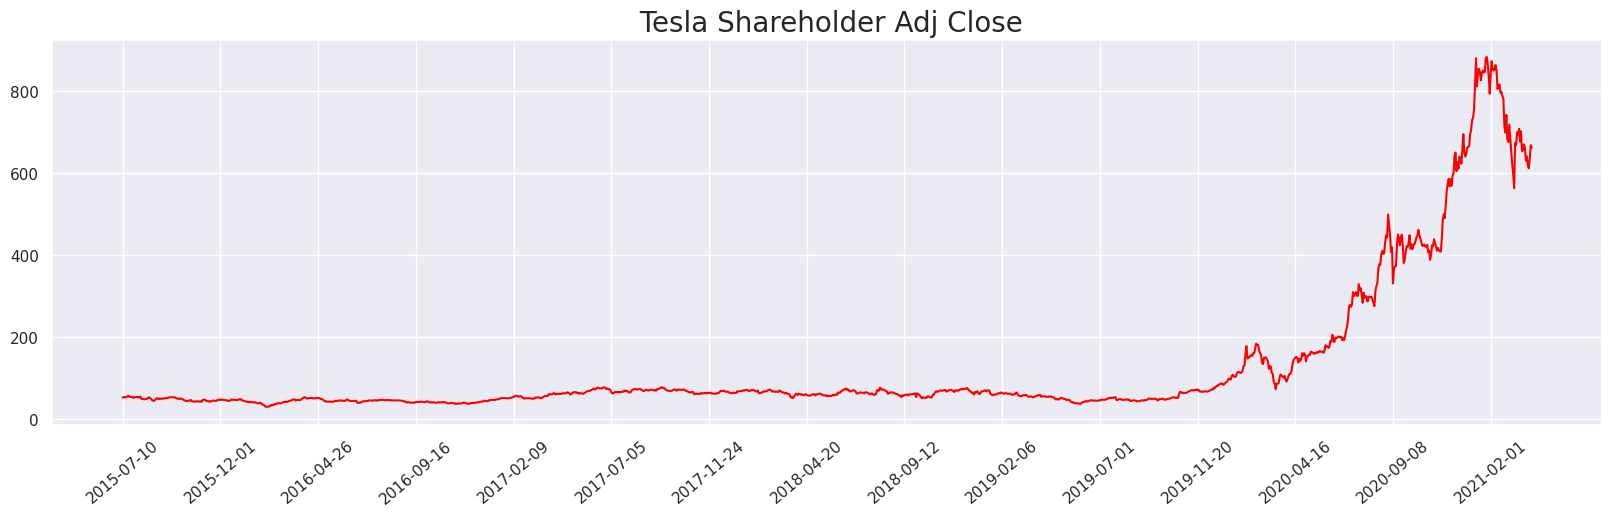

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def viz_ts(data, target,
           color = 'red', timestamp = 'Date',
           xlabel_freq = 100, figsize = (15,5), title = None):

    n = len(data)

    fig, axes = plt.subplots(1,1,figsize = (20,5))

    axes.grid(c = 'white')

    axes.plot(np.arange(0,n),
             data[target], color = color)

    x_labels_idx = np.arange(0, n, xlabel_freq)
    x_labels = data[timestamp].iloc[x_labels_idx ]
    axes.set_xticks(x_labels_idx)
    axes.set_xticklabels(x_labels, rotation = 40)

    if title is not None:
        axes.set_title(title, size = 20)

target = 'Adj Close'
timestamp = 'Date'
viz_ts(stockmarket_data, target, title = ' Tesla Shareholder ' +target)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def format_data_as_sequences(data, window_size, target_size = 1):

    n = len(data)
    data = data[[timestamp, target]]
    X, y = [],[]

    step = window_size+target_size
    for i in range(0,n - step, step):
        X.append(list(data[target].iloc[i:(i+window_size)]))
        y.append(list(data[target].iloc[(i+window_size):(i+window_size+target_size)]))

    return X,y


window_size = 10 #Number of Days to Consider to Make Prediction
X,y = format_data_as_sequences(stockmarket_data, window_size, target_size = 1)

# **Correction TP: Prediction of Tesla Shareholder Price (Prédiction du Prix des Actions de Tesla)**

In [ ]:
import requests
from io import BytesIO
import pandas as pd

def download_csv(spread_sheet_id):
    try:
        r = requests.get('https://docs.google.com/spreadsheet/ccc?key='+ spread_sheet_id + '&output=csv')
        req_content = r.content
        df = pd.read_csv(BytesIO(req_content))
        return df
    except Exception as e:
        print(e)

dataset_id = '1cosibeo803T_jmCMx6t-H0mqnk9NqB-cV80uflAzyLw'

stockmarket_data = download_csv(dataset_id)

* financial datasets can easily be downloaded from [here](https://finance.yahoo.com/quote/TSLA/history?period1=1436486400&period2=1594339200&interval=1d&filter=history&frequency=1d)

In [ ]:
display(stockmarket_data)
"""
-Open, High, Low, Close: share price at start, best, worst and the end of the day
-Adj Close:  More reliable approximation of the value of a stock Updated closing price.
             It takes into account: dividends, stock splits and new stock offers.
-Volume: number of shares traded per day.
"""

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000
...,...,...,...,...,...,...,...
1438,2021-03-26,641.869995,643.820007,599.890015,618.710022,618.710022,33778400
1439,2021-03-29,615.640015,616.479980,596.020020,611.289978,611.289978,28637000
1440,2021-03-30,601.750000,637.659973,591.010010,635.619995,635.619995,39432400
1441,2021-03-31,646.619995,672.000000,641.109985,667.929993,667.929993,33337300


'\n-Open, High, Low, Close: share price at start, best, worst and the end of the day\n-Adj Close:  More reliable approximation of the value of a stock Updated closing price.\n             It takes into account: dividends, stock splits and new stock offers.\n-Volume: number of shares traded per day. \n'

#### **Data Viz**

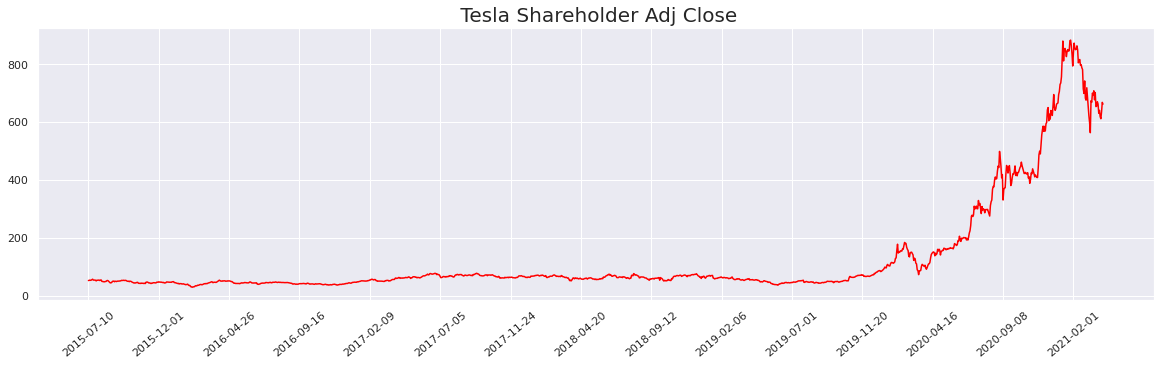

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def viz_ts(data, target,
           color = 'red', timestamp = 'Date',
           xlabel_freq = 100, figsize = (15,5), title = None):

    n = len(data)

    fig, axes = plt.subplots(1,1,figsize = (20,5))

    axes.grid(c = 'white')

    axes.plot(np.arange(0,n),
             data[target], color = color)

    x_labels_idx = np.arange(0, n, xlabel_freq)
    x_labels = data[timestamp].iloc[x_labels_idx ]
    axes.set_xticks(x_labels_idx)
    axes.set_xticklabels(x_labels, rotation = 40)

    if title is not None:
        axes.set_title(title, size = 20)

target = 'Adj Close'
timestamp = 'Date'
viz_ts(stockmarket_data, target, title = ' Tesla Shareholder ' +target)


#### **Data Engineering**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def format_data_as_sequences(data, window_size, target_size = 1):

    n = len(data)
    data = data[[timestamp, target]]
    X, y = [],[]

    step = window_size+target_size
    for i in range(0,n - step, step):
        X.append(list(data[target].iloc[i:(i+window_size)]))
        y.append(list(data[target].iloc[(i+window_size):(i+window_size+target_size)]))

    return X,y


window_size = 10 #Number of Days to Consider to Make Prediction
X,y = format_data_as_sequences(stockmarket_data, window_size, target_size = 1)

#3
scaler = MinMaxScaler(feature_range = (0,1))
X_std,y_std = scaler.fit_transform(X), scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size = 0.25, random_state = 42)

#### **Model Design + Training**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense

#RNN Models expects (num_training_examples, num_timesteps, num_features)
input_layer = Input(shape = (None,1), name = 'input_sequence')
h = SimpleRNN(32, activation = 'tanh', return_sequences = False, name = 'rnn_unit')(input_layer)
y = Dense(units = 1, activation = 'linear', name = 'shareholder_prediction')(h)

my_rnn = Model(input_layer, y)
my_rnn.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])
my_rnn.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_sequence (InputLayer)  [(None, None, 1)]         0         
_________________________________________________________________
rnn_unit (SimpleRNN)         (None, 32)                1088      
_________________________________________________________________
shareholder_prediction (Dens (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_rnn.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 0.0526 - mse: 0.0526
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0033 - mse: 0.0033
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 8.6827e-04 - mse: 8.6827e-04
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0016 - mse: 0.0016
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 5.6146e-04 - mse: 5.6146e-04
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0066 - mse: 0.0066
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 4.7900e-04 - mse: 4.7900e-04
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0038 - mse: 0.0038
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 7.4958e-04 - mse: 7.4958e-04
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0199 - mse: 0.0199
Epoch 11/100
4/4 [=============================

#### **Model Testing + Validation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


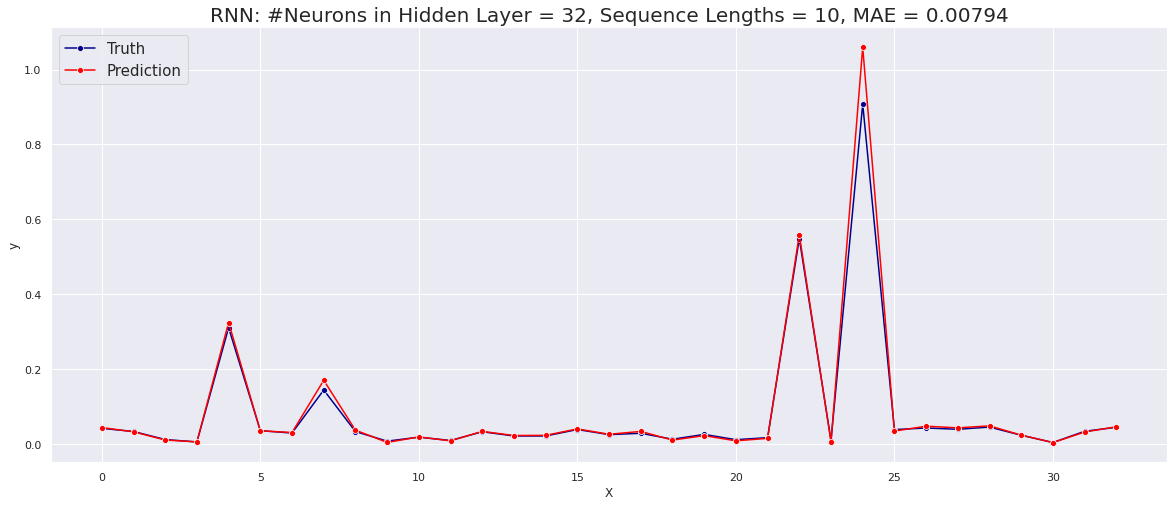

In [ ]:
def viz_predictions(y_test, y_hat, figsize = (20,8), title = None):
    fig, axes = plt.subplots(figsize = figsize)

    sns.lineplot(np.arange(0,len(y_test)), y_test.reshape(-1),
                 color = 'darkblue', ax = axes, label = 'Truth', marker = 'o')
    sns.lineplot(np.arange(0,len(y_test)), y_hat.reshape(-1),
                 color = 'red', ax = axes, label = 'Prediction', marker = 'o')
    axes.set_xlabel('X')
    axes.set_ylabel('y')
    plt.legend(loc = 'upper left', prop = {'size': 15})

    if title is not None:
        axes.set_title(title, size = 20)


X_test_reshaped =  X_test.reshape(-1,window_size,1)
y_hat = my_rnn.predict(X_test_reshaped)

mae = mean_absolute_error(y_test, y_hat)

title = 'RNN: #Neurons in Hidden Layer = ' + str(h.shape[1])  + ', Sequence Lengths = ' + str(X_train.shape[1]) + ', MAE = ' + "%0.5f"%mae
viz_predictions(y_test, y_hat, figsize = (20,8), title = title)
